<a href="https://colab.research.google.com/github/p-disha007/Unified-Mentor/blob/main/animal_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.utils import image_dataset_from_directory
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')


# Load dataset
dataset_path = "/content/drive/My Drive/dataset"
batch_size = 32
img_size = (224, 224)

train_dataset = image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=img_size,
    batch_size=batch_size
)

val_dataset = image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=img_size,
    batch_size=batch_size
)

# Inspect class names
class_names = train_dataset.class_names
print("Classes:", class_names)
from tensorflow.keras.layers import RandomFlip, RandomRotation, RandomZoom

data_augmentation = tf.keras.Sequential([
    RandomFlip("horizontal"),
    RandomRotation(0.1),
    RandomZoom(0.1),
])
from tensorflow.keras import layers, models
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.preprocessing import image_dataset_from_directory

# Define the image size and batch size
img_size = (224, 224)
batch_size = 32

# Load the dataset
dataset_path = "/content/drive/My Drive/dataset"  # Update the path if needed

train_dataset = image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=img_size,
    batch_size=batch_size
)

# Load MobileNetV2 with pre-trained weights and without the top layer (for transfer learning)
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model layers to avoid updating them during training
base_model.trainable = False

# Build the model
model = models.Sequential([
    layers.InputLayer(input_shape=(224, 224, 3)),  # Define the input shape explicitly
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dense(len(train_dataset.class_names), activation='softmax')  # Assuming the number of classes matches dataset
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Summary of the model
model.summary()
epochs = 10
history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=epochs
)
# Fine-tuning
base_model.trainable = True  # base_model is accessible here since it's defined in the same cell
model.compile(optimizer=tf.keras.optimizers.Adam(1e-5),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

fine_tune_epochs = 5
history_fine = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=fine_tune_epochs
)


Mounted at /content/drive
Found 1944 files belonging to 14 classes.
Using 1556 files for training.
Found 1944 files belonging to 14 classes.
Using 388 files for validation.
Classes: ['Bird', 'Cat', 'Cow', 'Deer', 'Dog', 'Dolphin', 'Elephant', 'Giraffe', 'Horse', 'Kangaroo', 'Lion', 'Panda', 'Tiger', 'Zebra']
Found 1944 files belonging to 14 classes.
Using 1556 files for training.
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224 (Functional)    │ (None, 7, 7, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         163,968 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 14)                  │           1,806 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,423,758 (9.25 MB)

 Trainable params: 165,774 (647.55 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

Epoch 1/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 466s 9s/step - accuracy: 0.2150 - loss: 2.4385 - val_accuracy: 0.3814 - val_loss: 1.9081
Epoch 2/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 145s 2s/step - accuracy: 0.4914 - loss: 1.5811 - val_accuracy: 0.5052 - val_loss: 1.6396
Epoch 3/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 111s 2s/step - accuracy: 0.6173 - loss: 1.2371 - val_accuracy: 0.4665 - val_loss: 1.5835
Epoch 4/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 129s 2s/step - accuracy: 0.6663 - loss: 1.0833 - val_accuracy: 0.5232 - val_loss: 1.4714
Epoch 5/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 120s 2s/step - accuracy: 0.7052 - loss: 0.9187 - val_accuracy: 0.5696 - val_loss: 1.3928
Epoch 6/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 100s 2s/step - accuracy: 0.7741 - loss: 0.7823 - val_accuracy: 0.5747 - val_loss: 1.4399
Epoch 7/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 145s 2s/step - accuracy: 0.8101 - loss: 0.6739 - val_accuracy: 0.5954 - val_loss: 1.3481
Epoch 8/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 149s 2s/step - accuracy: 0.8431 - loss: 0.5939 - val_accuracy: 0.6211 - v

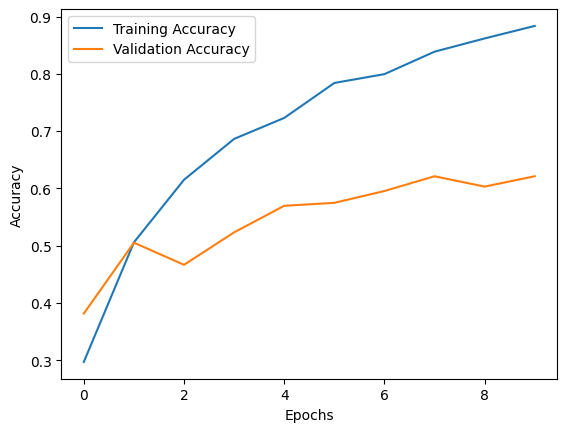

13/13 ━━━━━━━━━━━━━━━━━━━━ 19s 1s/step - accuracy: 0.5095 - loss: 2.5261
Validation Accuracy: 0.48


In [ ]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Evaluate on validation data
loss, accuracy = model.evaluate(val_dataset)
print(f"Validation Accuracy: {accuracy:.2f}")


In [19]:
!pip install --upgrade --no-cache-dir gdown
!pip install gdown
# Save the model
model.save('animal_classifier_model.h5')


# Load and test
from tensorflow.keras.preprocessing import image
import numpy as np
import gdown # Import gdown for downloading files from google drive
import re
import os # Import os module
from PIL import Image # Import the PIL library
import requests # Import requests for handling URLs
from io import BytesIO # Import BytesIO for working with in-memory files

def predict_image(img_path):
    """
    Predicts the class of an image.

    Args:
        img_path: Path to the image file or Google Drive link.

    Returns:
        The predicted class of the image.
    """
    # If the image path is a Google Drive link, download the image first
    if "drive.google.com" in img_path:
        # Modify the link to get the direct download link
        img_path = re.sub(r'/view', '', img_path)  # remove '/view'
        img_path = re.sub(r'usp=sharing', 'usp=drive_link', img_path)  # remove '/view'
        # Extract the file ID from the Google Drive link
        file_id = img_path.split('/')[-2]
        # Construct the direct download link
        img_path = f"https://drive.google.com/uc?id={file_id}"
        temp_file = 'temp_image.jpg'  # Temporary file name
        gdown.download(img_path, temp_file, quiet=False)  # Download image
        img_path = temp_file  # Use the temporary file path
    # If the image path is a URL, download the image first
    elif img_path.startswith("http"):
        response = requests.get(img_path) # Get image from URL
        response.raise_for_status() # Raise exception if download fails
        img = Image.open(BytesIO(response.content)) # Open image from response content
        img = img.convert('RGB')  # Convert to RGB if needed
        img = img.resize(img_size) # Resize image
    # If the image path is a local file, load it directly
    else:
        try:
            img = image.load_img(img_path, target_size=img_size)
        except Image.UnidentifiedImageError: # Use Image instead of PIL
            print(f"Error: Could not open or read image file: {img_path}")
            # Check file extension and try opening with correct format if necessary
            file_extension = os.path.splitext(img_path)[1].lower()
            if file_extension not in ['.jpg', '.jpeg', '.png', '.gif', '.bmp']:  # Add other supported extensions if needed
                print(f"The file {img_path} has an unsupported extension.")
                # Try to determine the image type using mimetypes
                import mimetypes
                mime_type, _ = mimetypes.guess_type(img_path)
                if mime_type and mime_type.startswith('image/'):
                    print(f"Detected mime type: {mime_type}")
                    # Try opening the image using the detected mime type
                    try:
                        img = Image.open(img_path)
                        img = img.convert('RGB')  # Convert to RGB if needed
                        img = img.resize(img_size) # Resize image
                    except Exception as e:
                        print(f"Error opening with mime type: {e}")
                        return None  # or handle the error appropriately
                else:
                    print("Could not determine the image type. Please check the file.")
                    return None  # or handle the error appropriately
            else:
                print("The file might be corrupted. Please check the file.")
                return None  # or handle the error appropriately

    img_array = image.img_to_array(img) / 255.0
    img_array = tf.expand_dims(img_array, 0)
    predictions = model.predict(img_array)
    predicted_class = class_names[np.argmax(predictions)]
    return predicted_class

# Replace with a publicly accessible image URL or ensure the original file has public access
test_img = "https://upload.wikimedia.org/wikipedia/commons/thumb/4/4d/Cat_November_2010-1a.jpg/1200px-Cat_November_2010-1a.jpg"
print("Predicted Class:", predict_image(test_img))

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Predicted Class: Horse
